<a href="https://colab.research.google.com/github/vicotrbb/machine_learning/blob/master/machine_learning/neural_networks/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural networks

### Observações

* **Nenhum(a)** dos gifs/imagens utilizadas aqui são de minha autoria.

### Referencias

* https://matheusfacure.github.io/2017/07/12/activ-func/#sig
* https://iamtrask.github.io/2015/07/12/basic-python-network/
* https://en.wikipedia.org/wiki/Sigmoid_function#Applications
* https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu

## Oque é uma rede neural

Redes neurais são um sistema de computação inspiradas por redes neurais biologicas que formam o cerebro de seres vivos. Estes sistemas são capazes de "aprender" a efetuar tarefas, geralmente sem a necessidade de programar as rotinas das tarefas previamente.

Um rede neural é composta por 3 tipos de camadas:

* **Camada de entrada** -> A camada de entrada é responsavel por realizar o input de informações;

* **Camada oculta** -> É a camada intermediaria entre a de entrada e de saída e é responsavel por performar toda a computação(pode haver mais de uma);

* **Camada de saída** -> A camada de saída é responsavel por realizar o output da informação.

<img src='https://miro.medium.com/max/500/1*3fA77_mLNiJTSgZFhYnU0Q.png'>


## Principais aplicações de uma rede neural

TO-DO

# Camadas de uma rede neural

TO-DO

# Funções de ativação

As funções de ativação tem a responsabilidade de introduzir valores não lineares ao modelo de uma rede neural, habilitando a rede a trabalhar com valores desconhecidos, além das relações lineares entre as variaveis dependentes e independentes.

Para um exemplo prático, vejamos o seguinte modelo de uma rede neural de duas camadas(os vieses foram omitidos):

>$ y = \phi(\phi(\pmb{X}\pmb{W_1})\pmb{W_2})\pmb{w} $

Onde:
* $\pmb{X}$ = Matriz de dados
* $\pmb{W_1}$ = Pesos das camadas oculta
* $\pmb{w}$ = Pesos da camada de saida
* $\phi$ = função de ativação/função não linear

Note que caso nós retiremos as funções não lineares do modelo, temos o seguinte resultado:

>$ y = \pmb{X}\pmb{W_1}\pmb{W_2}\pmb{w} $

Note que se levarmos em consideração que $ \pmb{W_1}\pmb{W_2}\pmb{w} $ é $\pmb{u}$, teremos o seguinte resultado:

>$ y = \pmb{X}\pmb{u} $

Este resultado é exatamente um regressão linear, de forma que essa rede neural sem a função de ativação/função não linear, estára sujeita as mesmas restrições dos modelos lineares.


# Principais tipos de funções de ativação

<img src=https://mlfromscratch.com/content/images/2019/12/activation-functions.gif>

## Função sigmoide
---
A **função sigmoide** é uma função usada amplamente na matemárica ecomica e computacional, é chamada dessa forma por sua caracteristica grafica em forma de "S", chamada de curva de sigmoide. A função sigmoide é utilizada para a criação e transformação de componentes matematicos não lineares.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1280px-Logistic-curve.svg.png width="500">


### Definição da função sigmoide

>$ \sigma(x)=\frac{1}{1+e^x} $

Sua derivada:

> $ \sigma'(x)=\sigma(x)(1-\sigma(x)) $

onde: 

> $ e = 2.718 $, constante de euler

No caso do primeiro algoritmo de exemplo, a função sigmoide está sendo utilizada para converter os valores em probabilidades. 


## E como fica o código de uma função sigmoide?

No código utilizamos o método numpy.exp, este método realiza uma exponenciação da constante de Euler pelo parametro passado pelo método

* $ euler = 2.718 $

In [6]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [11]:
mmatrix = np.array([[1,-2,3],[4,0,6]])
print('Valor da matriz [[1,2,3],[4,0,6] ao passar por uma função de ativação sigmoide: \n', sigmoid(mmatrix))

Valor da matriz [[1,2,3],[4,0,6] ao passar por uma função de ativação sigmoide: 
 [[0.73105858 0.11920292 0.95257413]
 [0.98201379 0.5        0.99752738]]


## tanH
---

A **função Tangencial hiperbolica(tanh)** é utilizada como função de ativação,derivada da função sigmoidal(contendo tambem um grafico com formato em S), sendo orientada ao zero e contendo um *range* entre -1 e 1.

A principal vantagem dessa FA em relação a função sigmoide é seu forte mapeamento de valores abaixo de zero, ou seja: *inputs* negativos tenderão fortemente para valores mais negativos e valores perto de zero tenderão a ficar proximo de zero.

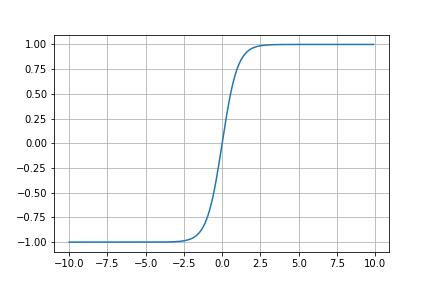

### Definição da função tanh

> $ tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

Sua derivada:

> $ tanh(x) = 1 - f(x)^{2} $

onde: 

> $ e = 2.718 $, constante de euler

Podemos observar o efeito do mapeamento de valores tendendo ao -1 se compararmos os códigos de exemplo entre a função sigmoide e a função tanh. Veja por exemplo o valor -2(presente na matriz), na função sigmoide, tendeu ao positivo, já na tanh, tendeu fortemente ao -1. O mesmo se observa com o 0.

## E como fica o código de uma função tanh?

No código utilizamos o método numpy.exp, este método realiza uma exponenciação da constante de Euler pelo parametro passado pelo método

* $ euler = 2.718 $

In [8]:
import numpy as np

def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [10]:
mmatrix = np.array([[1,-2,3],[4,0,6]])
print('Valor da matriz [[1,2,3],[4,0,6] ao passar por uma função de ativação sigmoide: \n', tanh(mmatrix))

Valor da matriz [[1,2,3],[4,0,6] ao passar por uma função de ativação sigmoide: 
 [[ 0.76159416 -0.96402758  0.99505475]
 [ 0.9993293   0.          0.99998771]]


## ReLu 
---
A ativação linear retificada é extremamente semelhante a função identidade, sendo diferente apenas que a ReLu produz zero em metade de seu dominio e como consequencia, as derivadas se mantêm grandes enquanto a unidade estiver ativa.

<img src=https://matheusfacure.github.io/img/tutorial/activations/RELU.png width="500">

A definição da função ReLu é a seguinte:

> $ ReLU(x) = max(0,x) $

E sua derivada:

> $ ReLU'(x)= \begin{cases}
    	1, & \text{se } x\ge 0\\
    	0, & \text{se } x\leq 0
	    \end{cases} $

Note que as derivadas não são apenas grandes, mas também estáveis, sendo 1, quando $ x>0 $ e 0 quando $ x<0 $. Note tambem que a segunda derivada é zero em todo o domínio.

A ativação ReLu é muito mais eficiente que a ativação sigmoidal por exemplo, contribuindo para popular ainda mais o deep learning e mostrando como algo simples pode ser poderoso.


## E como fica o código de uma função ReLu?

In [ ]:
import numpy as np

def relu(x):
  return np.maximum(0,x)

In [ ]:
mmatrix = np.array([[1,2,3],[4,0,6]])
print('Valor da matriz [[1,2,3],[4,0,6] ao passar por uma função de ativação ReLu: \n', relu(mmatrix))

Valor da matriz [[1,2,3],[4,0,6] ao passar por uma função de ativação ReLu: 
 [[1 2 3]
 [4 0 6]]


## Softmax
---
A função softmax é utilizada para modelos de predição de multiplas classes principalmente. A função produz saidas entre 0 e 1, sendo que a soma das saidas em modelos de classificação de classes, sera sempre 1.

A definição da função Softmax é a seguinte:

> $ f(x) = \frac{\exp(x_i)}{\sum \exp(x_i))} $

A principal diferença entre uma função sigmoide e uma função softmax é seu objetivo de uso, enquanto a função sigmoide é custumeiramente utilizada pra classificação binaria a função softmax é utilizada para classificações multiplas. 

## E como fica o código de uma função Softmax?

In [ ]:
def softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X))
    return expo/expo_sum

In [ ]:
mmatrix = np.array([[1,2,3],[4,0,6]])
print('Valor da matriz [[1,2,3],[4,0,6] ao passar por uma função de ativação \
ReLu: \n', softmax(mmatrix))

Valor da matriz [[1,2,3],[4,0,6] ao passar por uma função de ativação ReLu: 
 [[0.00555636 0.01510375 0.04105626]
 [0.11160249 0.00204407 0.82463706]]


In [ ]:
result = softmax(mmatrix)
print('Prova de que a soma dos valores de saida da função sempre será 1: ',
      np.sum(result))

Prova de que a soma dos valores de saida da função sempre será 1:  1.0


## Principais casos de uso para cada função

* Softmax -> Classificação multipla
* Sigmoide -> Classificação binaria
* ReLu -> Redes neurais convolucionais

# Bias/Viés

Um Bias/Viés represeta uma variação fixa no calculo de alguma coisa, no caso de redes neurais, utilizamos um valor de bias durante o calculo dos neuronios.

Exemplo: Ao se pesar em uma balança convencional, o valor nunca sera 100% preciso, pois, existe o peso dos itens que estão no seu corpo(roupas, relogio e etc), esse valor dos itens é uma variancia fixa e é chamado de Bias.

# Funcionamento de uma rede neural


## Neuronios
---
Os neuronios são a unidade mais basica de uma rede neural, cada RN pode ter um numero diferente de neuronios com funcionamentos diferentes, mas basicamente, os neuronios recebem um dado, processam ele e devolvem outro dado processado. O processo realizado dentro de cada neuronio é parte crucial para definir o funcionamento das redes neurais.

<img src=https://victorzhou.com/a74a19dc0599aae11df7493c718abaf9/perceptron.svg width="350">

O exemplo acima representa um neuronio de duas entradas, o processo que está aconcendo dentro dele pode ser definido como o seguinte:

Primeiro, cada entrada é multiplicada por um peso:

* $ x_1 = x_1 * w_1 $
* $ x_2 = x_2 * w_2 $

Segundo, o resusltado das entradas multiplicadas pelo peso são somadas a um bias/viés.

* $ \alpha = x_1 + x_2 + b $

Terceiro, o resultado passa por uma função de ativação/não linearidade(Explicada a diante):

* $ y = f(\alpha) $

No final, a seguinte equação define os neuronios:

* $ y = f(x_1 * w_1 + x_2 * w_2 + b) $

Para melhor entendimento, segue o exemplo:

Parametros:
* $ w_1 = 0, w_2 = 1 $
* $ b = 4 $
* $ f() = \frac{1}{1+e^x} $ (sigma function)

Entradas:
* $ x_1 = 2, x_2 = 3 $

Ex:

* $ y = f(2 * 0 + 3 * 1 + 4) $
* $ y = f(7) $
* $ y \approx 0,999 $



## Como codar um neuronio?

Basicamente, o código de um neuronio compreende todos os processos matematicos que aquele neuronio foi designado pra fazer.

Segue exemplo:

In [ ]:
import numpy as np

In [ ]:
class Neuron:

  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

In [ ]:
neuron = Neuron(np.array([0, 2]), 4)
print('Valor das entradas 2 e 3 depois do processamento no neuronio: ')
print(neuron.feedforward(np.array([2,3])))

Valor das entradas 2 e 3 depois do processamento no neuronio: 
0.9999546021312976


## Relacionamento entre neuronios

Como mencionado anteriormente, uma rede neural nada mais é do que um conjunto de neuronios agrupados e trabalhando em conjunto, onde a saida de um, é a entrada de outro.

<img src='https://miro.medium.com/max/3000/1*BIpRgx5FsEMhr1k2EqBKFg.gif' width="500">

Como pode ser observado no exemplo a cima, cada neuronio comunica-se com todos os outros na proxima camada, enviando seu output para cada um deles.

A estrutura de uma rede neural pode seguir diversos tipos de arquiteturas, contudo, normalmente é melhor representada e construida em cima de um grafo.

Os diversos tipos de relacionamentos entre os neuronios de uma rede definem que tipo de rede ela se dará.

## Como codar um relacionamento entre os neuronios para formar uma rede "Feedforward"

Lembrando que redes neurais do tipo Feedforward não formam um ciclo, sendo o mais simples tipo de rede neural.

Vamos então criar uma rede neural com 3 entradas, uma camada oculta com 3 neuronios e 1 neuronio de saída. Assumindo as seguintes variaveis:

* $\pmb{w_n}$ = [1, 0]
* $\pmb{x_n}$ = [2, 3]
* $\pmb{b}$ = 0

In [ ]:
import numpy as np

class FeedforwardNetwork:

  def __init__(self):
    weights = np.array([1, 0])
    bias = 0

    self.n1 = Neuron(weights, bias)
    self.n2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_n1 = self.n1.feedforward(x)
    out_n2 = self.n2.feedforward(x)
    out_o1 = self.o1.feedforward(np.array([out_n1, out_n2]))

    return out_o1

network = FeedforwardNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7069873680001046


# Avaliando uma rede neural

Avaliar uma rede neural tem como principais objetivos entender o quão bom a rede está se comportando e ser capaz de quantificar o quanto as alterações que realizamos nos dados e no modelo afetam sua acuracia

## Loss - Perda

A métrica de Loss representa basicamente o quão bem um modelo foi predizendo um exemplo em especial, este dado é utilizado de muitas formas e existem diversas formulas de calcula-lo(como será explicado nos proximos tópicos).

Lembrando que quanto menor o Loss/perda, melhor o modelo.

## Formulas para calculo do Loss

## mean squared error (MSE)

O erro quadrático médio (MSE) é uma formula utilizada para calcular o erro quadrático de um estimador, levando em consideração o valor estimado e o valor real do exemplo utilizado.

Sua formula é a seguinte:

* $ MSE = \frac{1}{n}\sum (y_{true} - y_{pred})^{2} $

Onde:

* $ n $ representa o numero de amostras utilizadas
* $ y $ representa a variavel que está sendo predizida
* $ y_{true} - y_{pred} $ são os valores que representam a amostra, sendo **true** o valor real e **pred** o valor predizido

## Como codar um algoritmo de MSE

In [ ]:
import numpy as np

def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


## Sparse Categorical Crossentropy

# Treinando uma rede neural

## Tipos de treinos de uma rede neural

# Otimizadores

# Tipos de redes neurais



<img src='https://mk0iaexpertacadlbryk.kinstacdn.com/wp-content/uploads/2020/06/image-3.png' width=800>

## Perceptron (P), Feed Forward Network (FFN), Radial Basis Network (RBF) & Deep Feed Forward(DFF)

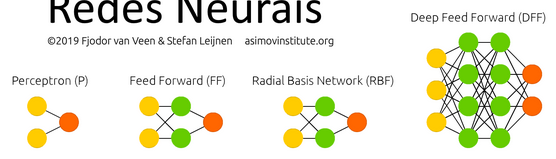
 


Este tipo de rede neural carateriza os modelos mais basicos que existem, o processo realizado é 100% linear da entrada à saida. Em cada neuronio é realizada uma função matematica linear do tipo $W_x + b$, onde x é o valor de entrada, e W e b são os parametros de peso e bias. 

O resultado dessa operação pode ou não passar por uma função de ativação antes de partir para a camada adiante.

A conexão entre os neuronios representam a passagem de informação de um para o proximo, neuronios que recebem mais de uma entrada, soma elas antes de perfomar a função linear pelo qual é responsavel.

* Perceptron -> Modelo mais basico.
* Feed Forward Network -> Performa um impacto sintetico dos dados de entrada nos dados de saída.
* Radial Basis Network -> Executa funções de ativação com base radial.

As NN do tipo FFN e RBF podem conter varias camadas ocultas, sendo comumente chamadas de redes neurais profundas nesse caso.

Estas redes neurais são comumente utilizadas para solucionar problemas mais simples e que não demandam um correlacionamento temporal/espacial.

Alguns de seus usos são:
* Determinar doenças apartir de exames de sangue
* Determinar irregularidades em transações simples
* Detectar incosistencias em sistemas de armazenamentos
* Entre outros...

## E como fica o código de uma rede neural dessas?

Bom, o código de uma rede neural do tipo FFN ja foi descrito a cima, contudo, segue o mesmo exemplo:

In [ ]:
import numpy as np

class FeedforwardNetwork:

  def __init__(self):
    weights = np.array([1, 0])
    bias = 0

    self.n1 = Neuron(weights, bias)
    self.n2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_n1 = self.n1.feedforward(x)
    out_n2 = self.n2.feedforward(x)
    out_o1 = self.o1.feedforward(np.array([out_n1, out_n2]))

    return out_o1

network = FeedforwardNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7069873680001046


## Rede neural recorrente(RNN)

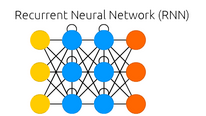


Este modelo de rede neural pode-se de dizer que foi o primeiro a implementar um sistema recorrente no fluxo de dados da rede, dessa forma, os modelos deste modelo são capazes de considerar proprios dados durante o calculo de suas funções matematicas.

Além dos dados da camada anterior, os neurônios escondidos da rede neural recorrente utilizam tambem o resultado do seu calculo anterior, realizado no periodo temporal(epoch) anterior.

Dessa forma as RNN's são capazes de considerar correlações temporais entre os dados de entrada.

Este modelo foi essencial para a avolução das redes neurais e foi amplamente utilizado para descrever modelos que representam dados com fortes correlações temporais.

Dessa forma, esse modelo pode ser utilizado para os seguintes propositos:

* Previsão do clima baseado em janelas de tempo passadas.
* Previsões monatárias ou de ativos baseados em valores históricos.


## E como fica o código de uma rede neural RNN?

TO-DO

In [ ]:
import numpy as np

class RecurrentNetwork:

  def __init__(self):
    weights = np.array([1, 0])
    bias = 0

    self.n1 = Neuron(weights, bias)
    self.n2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x, epochs):
    out_n1 = self.n1.feedforward(x)
    out_n2 = self.n2.feedforward(x)
    for _ in np.arange(epochs):
      out_n1 = self.n1.feedforward(out_n1)
      out_n2 = self.n2.feedforward(out_n2)
      print(out_n1, out_n2)

    out_o1 = self.o1.feedforward(np.array([out_n1, out_n2]))
    return out_o1

network = RecurrentNetwork()
x = np.array([2, 3])
epochs = 5
print(network.feedforward(x, epochs))

[0.70698737 0.5       ] [0.70698737 0.5       ]
0.6697351368613155 0.6697351368613155
[0.66144385 0.5       ] [0.66144385 0.5       ]
0.6595846545654619 0.6595846545654619
[0.65916708 0.5       ] [0.65916708 0.5       ]
[0.65907326 0.62245933]


## Long/Short Therm Memory(LSTM) & Gated Recurrent Unit(GRU)

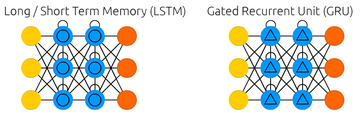



Dessa forma, esse modelo pode ser utilizado para os seguintes propositos:

* Reconhecer padrões de fala e escrita;
* Realizar analise de videos e imagens(principalmente videos);
* Analisar padrões com forte correlação temporal.

## E como fica o código de uma rede neural LSTM/GRU?

TO-DO

# Hyperparametros

Hyperparametros são os atributos que irão definir a arquitetura(Ex: número de neuronios ocultos) do modelo da sua rede neural, bem como como a sua rede neural irá ser treinada(Ex: taxa de treino), esses paraemtros são definidos antes de iniciar o treinamento do modelo e são de extrema importancia para a perfomance, eficacia e acuracia do modelo.




# Principais tipos de Hyperparametros

Estes são alguns dos principais hyperparametros que podemos utilziar para trinar alguns modelos de redes neurais, bem como a sua definição e onde podemos utiliza-los.

### Nº de camadas ocultas
---
Este parametro define o numero de camadas ocultas entre a camada de entrada e a camada de saida da sua rede neural, é amplamante utilizada em todas as redes neurais.

Basicamente, estas camadas ocultas são utilizadas para melhorar a acuracia do seu modelo, pode-se adicionar novas camadas até que não faça mais diferença se adicionar mais alguma.

Varias camadas com boas tecnicas de regularização podem aumentar muito a acuracia do modelo, já se não forem utilizadas ou utilizar poucas, pode acabar gerando um efeito de *underfitting*.

*“Very simple. Just keep adding layers until the test error does not improve anymore.”*

* Utilizado em: Arquitetura do modelo

## Dropout
---
Dropout é um parametro utilizado para evitar *overfitting*, aumentar a acuracia e melhorar o poder de generalização.

Geralmente, se utiliza o dropout com valores entre 10% a 50%(porcentagens fazenbdo sempre referencia ao numero de neuronios), 20% pode ser um ponto pra começar a testar a eficacia do parametro. Caso o valor for muito baixo para o tamanho do modelo, o efeito será quase imperceptivel, caso for muito grande, o modelo irá perder poder de aprendizagem.

Normalmente o dropout tem mais efeito em redes neurais grandes, dando mais oportunidade da rede neural estabelecer novas representações e conexões.

* Utilizado em: Arquitetura do modelo

## Função de ativação
---
Como ja explicado anteriormente, as funções de ativação são utilizadas para introduzir elementos de não linearidade ao modelo de rede neural. 

Para mais informações, consultar "Função de ativação de uma rede neural"

* Utilizado em: Arquitetura do modelo

## Taxa de aprendizado
---
A taxa de aprendizado define o quão rapido o modelo irá atualizar seus parametros durante o treinamento, uma baixa taxa de aprendizado pode atrasar o treinamento, contudo, em algum momento irá normalizar. Altas taxas de treinamento pode acelerar o treinamento do modelo, contudo, pode não haver normalização e o modelo não convergir para sua linha natural.

Normalmente, se prefere uma taxa de aprendizado decadente.

* Utilizado em: Processo de treinamento do modelo

## Momentum
---

Este parametro é utilizado para direcionar o aprendizado do modelo de acordo com o resultado da geração de treinamento anterior, ajudando a reduzir oscilações.

Normalmente, é preferivel manter este parametro entre 0,5 e 0,9.

* Utilizado em: Processo de treinamento do modelo

## Numero de *Epochs*
---

O numero de *epochs* define o numero de vezes que o dataset de treino irá passar pelo modelo e consequentenmente, quantas vezes o modelo irá treinar utilizando esses dados.

Caso o modelo não treine por epocas suficientes, ele não ficará preciso, caso treine por epocas demais, pode ocorrer o efeito de *overfitting*. 

* Utilizado em: Processo de treinamento do modelo

## Batch size
---

O tamanho do *batch* define o tamanho dos subgrupos de dados que serão "entregues" ao modelo depois de cada atualização de parametros.

Normalmente, o tamanho padrão é definido por multiplos de 32 sendo o tamanho 128 o mais utilizado.

* Utilizado em: Processo de treinamento do modelo

# Modelo de rede neural generica

TO-DO

# Exemplos e implementações

## MLPClassifier utilizando keras

Este exemplo implementa um classificador MLP(Multilayer perceptron), normalmente utilizado para realizar classificação.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier

iris_dataset = load_iris()
data = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
data['target'] = iris_dataset.target

validation = data.sample(5)
data.drop(validation.index, axis=0, inplace=True)

features = data.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, data['target'], random_state=42, test_size=0.25)

model = MLPClassifier(max_iter=1000)
model.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
sample = np.array([5., 2., 3.5, 1.]).reshape(1, -1)
flower = model.predict(sample)
print(flower[0]) # Iris-Versicolour

1


In [ ]:
x_val = validation.drop('target', axis=1)
y_val = validation['target']

model.score(x_val, y_val)

1.0

## Rede neural convolucional(Tensorflow) para detecção de tumor cerebral

Este modelo de rede neural convolucional é excelente para trabalhar com imagens e categorização das mesmas, amplamente utilizada no mundo médico, como pode ser observado pelo exemplo.

In [ ]:
import numpy as np
import os
import cv2
import random
import pickle
from zipfile import ZipFile

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pickle
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def prepare_data(datadir, img_size=28):
	file_list = []
	class_list = []
	x = []
	y = []
	data = []
	error = False
	categories = ['NO', 'YES']

	for category in categories: 
		path = os.path.join(datadir, category)
		class_index = categories.index(category)
		for img in os.listdir(path):
			try:
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (img_size, img_size))
				data.append([new_array, class_index])
			except Exception as e:
				error = True
				pass

	random.shuffle(data)

	for features, label in data:
		x.append(features)
		y.append(label)

	x = np.array(x).reshape(-1, img_size, img_size, 1)
	if error:
		print('Erro ao processar algums imagens')
	else:
		print('Imagens processadas com sucesso')
	return x, y

In [ ]:
x, y = prepare_data('drive/My Drive/Brain/brain-mri-tumor-detection-dataset')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.1, random_state=5)

In [ ]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)

x_train = x_train / 255
x_test = x_test / 255
x_val = x_val / 255

In [ ]:
model = Sequential()

# convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# output layer
model.add(Dense(2))
model.add(Activation("softmax"))

# Compile
model.compile(loss="sparse_categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1)

In [ ]:
scores = model.evaluate(x_test, y_test)
print("test length ", len(x_test))
print("test score %.2f%%" % (np.mean(scores[1] * 100)))

3/3 [==============================] - 0s 5ms/step - loss: 0.4025 - accuracy: 0.8676
test length  68
test score 86.76%


In [ ]:
scores = model.evaluate(x_val, y_val)
print("test length ", len(x_val))
print("evaluation score %.2f%%" % (np.mean(scores[1] * 100)))

1/1 [==============================] - 0s 1ms/step - loss: 0.7894 - accuracy: 0.8750
test length  8
evaluation score 87.50%


In [ ]:
def predict_image(file):
  img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (28, 28))
  img = new_array.reshape(-1, 28, 28, 1)
  prediction = model.predict([img])
  prediction = list(prediction[0])
  print(categories[prediction.index(max(prediction))])

In [ ]:
predict_image('drive/My Drive/Brain/brain-mri-tumor-detection-dataset/YES/Y21.jpg')

YES


In [ ]:
predict_image('drive/My Drive/Brain/brain-mri-tumor-detection-dataset/NO/N21.jpg')

NO


# Troubleshooting

Resolução de alguns dos problemas mais comuns que podem acontecer ao definir e treinar seu modelo.

## Input 0 is incompatible with layer lstm_xx: expected ndim=3, found ndim=2 in Keras

Este problema acontece pois as cadamadas do seu modelo não estão compartilhando o mesmo input/output.

Por exemplo, caso você tenha duas camadas LSTM seguidas, onde apenas a primeira tem definida o formato do input e o parametro *return_sequences* não estiver presente, é muito provavel que você tera esse erro, para resolver, apenas passe o parametro *return_sequences* para True, isto fara com que o output da primeira camada esteja de acordo com o input da segunda camada. 